In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
turbines1=pd.read_csv("gas_turbines.csv")
x=turbines1.drop("TEY", axis=1)
y=turbines1["TEY"]


In [3]:
x.shape

(15039, 10)

In [4]:
y=np.reshape(y.values, (-1,1))

In [5]:
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()

In [6]:
x_transform=scaler_x.fit_transform(x)
y_transform=scaler_y.fit_transform(y)

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_transform, y_transform)

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [10]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/150
181/181 [==============================] - 1s 2ms/step - loss: 0.0420 - mse: 0.0420 - mae: 0.1388 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0395
Epoch 2/150
181/181 [==============================] - 0s 1ms/step - loss: 6.7894e-04 - mse: 6.7894e-04 - mae: 0.0185 - val_loss: 3.1357e-04 - val_mse: 3.1357e-04 - val_mae: 0.0128
Epoch 3/150
181/181 [==============================] - 0s 1ms/step - loss: 2.4104e-04 - mse: 2.4104e-04 - mae: 0.0112 - val_loss: 1.6489e-04 - val_mse: 1.6489e-04 - val_mae: 0.0095
Epoch 4/150
181/181 [==============================] - 0s 2ms/step - loss: 1.5003e-04 - mse: 1.5003e-04 - mae: 0.0090 - val_loss: 1.3100e-04 - val_mse: 1.3100e-04 - val_mae: 0.0085
Epoch 5/150
181/181 [==============================] - 0s 2ms/step - loss: 1.3604e-04 - mse: 1.3604e-04 - mae: 0.0087 - val_loss: 1.2223e-04 - val_mse: 1.2223e-04 - val_mae: 0.0083
Epoch 6/150
181/181 [==============================] - 1s 3ms/step - loss: 1.2669e-04 - mse: 1.2669e-04 - mae: 

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


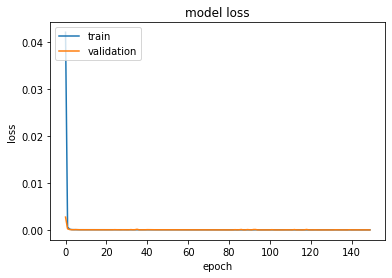

In [11]:
import matplotlib.pyplot as plt
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
model.evaluate(X_test,y_test)

118/118 [==============================] - 0s 976us/step - loss: 8.4879e-05 - mse: 8.4879e-05 - mae: 0.0067


[8.487944432999939e-05, 8.487944432999939e-05, 0.006730436813086271]

In [13]:
model.predict(X_test)

118/118 [==============================] - 0s 659us/step


array([[0.7025122 ],
       [0.28580713],
       [0.43827963],
       ...,
       [0.5134294 ],
       [0.16517122],
       [0.14322664]], dtype=float32)

In [14]:
y_test

array([[0.70378829],
       [0.28425578],
       [0.44975819],
       ...,
       [0.48535733],
       [0.16335304],
       [0.14212789]])

In [15]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse',metrics=['mse','mae'])
    return model

In [16]:
"""model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)"""

"model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)\noptimizer = ['SGD', 'RMSprop', 'Adagrad']\nparam_grid = dict(optimizer=optimizer)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)\ngrid_result = grid.fit(X_train, y_train)"

In [17]:
"""grid_result.cv_results_"""

NameError: name 'grid_result' is not defined

In [ ]:
"grid_result.best_score_"

-0.00011718665773514658

In [ ]:
"grid_result.best_params_"

{'optimizer': 'Adagrad'}

In [ ]:
"grid_result.predict(X_test)"

array([0.25336003, 0.78465796, 0.4829997 , ..., 0.76061773, 0.16629606,
       0.44516292], dtype=float32)

In [ ]:
"y_test"

array([[0.45499731],
       [0.63473939],
       [0.46493821],
       ...,
       [0.44975819],
       [0.23307362],
       [0.15542719]])

In [ ]:
"grid_result"

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021F73F09000>,
             n_jobs=1, param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']})

In [ ]:
"""params = grid_result.cv_results_['params']
params"""

NameError: name 'grid_result' is not defined

In [18]:
from keras.layers import Dropout
from keras.optimizers import Adagrad

In [19]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse',metrics=['mse','mae'])
    return model

In [20]:
def create_model_n(learning_rate,dropout_rate,init,neuron1,neuron2, activation_function):
    model1 = Sequential()
    model1.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model1.add(Dropout(dropout_rate))
    model1.add(Dense(1,activation = 'linear'))
    adam = Adagrad(lr = learning_rate)
    model1.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model1

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ["relu"]
init = ['uniform','normal']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

In [21]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [22]:
param_grids

{'batch_size': [10, 20, 40],
 'epochs': [10, 50, 100],
 'learning_rate': [0.001, 0.01, 0.1],
 'dropout_rate': [0.0, 0.1, 0.2],
 'activation_function': ['relu'],
 'init': ['uniform', 'normal'],
 'neuron1': [4, 8, 16],
 'neuron2': [2, 4, 8]}

In [23]:
from sklearn.model_selection import GridSearchCV, KFold

In [24]:
model_n = KerasRegressor(build_fn = create_model_n,verbose = 0)

In [25]:
grid = GridSearchCV(estimator = model_n,param_grid = param_grids,cv = KFold(),verbose = 10)

In [26]:
grid_result = grid.fit(x_transform,y_transform)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[CV 1/5; 1/1458] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/1458] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=-0.142 total time=  11.4s
[CV 2/5; 1/1458] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/1458] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=-0.017 total time=   9.6s
[CV 3/5; 1/1458] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/1458] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, 

In [ ]:
params = grid_result.cv_results_['params']
params

[{'optimizer': 'SGD'}, {'optimizer': 'RMSprop'}, {'optimizer': 'Adagrad'}]

In [ ]:
grid_result.best_estimator_

In [ ]:
grid_result.best_params_

{'optimizer': 'Adagrad'}

In [ ]:
grid_result.best_score_

-0.00011718665773514658